In [357]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


In [167]:
train_hr = pd.read_csv('train_LZdllcl.csv')
train_hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [168]:
train_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [169]:
train_hr.shape

(54808, 14)

In [170]:
train_hr_dropna =  train_hr.dropna(axis=0)

In [171]:
train_hr_dropna.shape

(48660, 14)

In [172]:
train_hr_dropna_copy = train_hr_dropna.copy()

In [173]:
train_hr_dropna['is_promoted'].value_counts()

0    44428
1     4232
Name: is_promoted, dtype: int64

In [174]:
train_hr_dropna['is_promoted'].value_counts()/train_hr_dropna.shape[0]*100


0    91.302918
1     8.697082
Name: is_promoted, dtype: float64

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


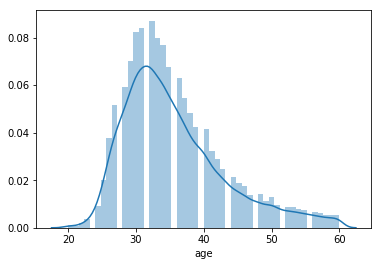

In [175]:
age_dist = sns.distplot(train_hr_dropna['age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAF958E320>,
      dtype=object)

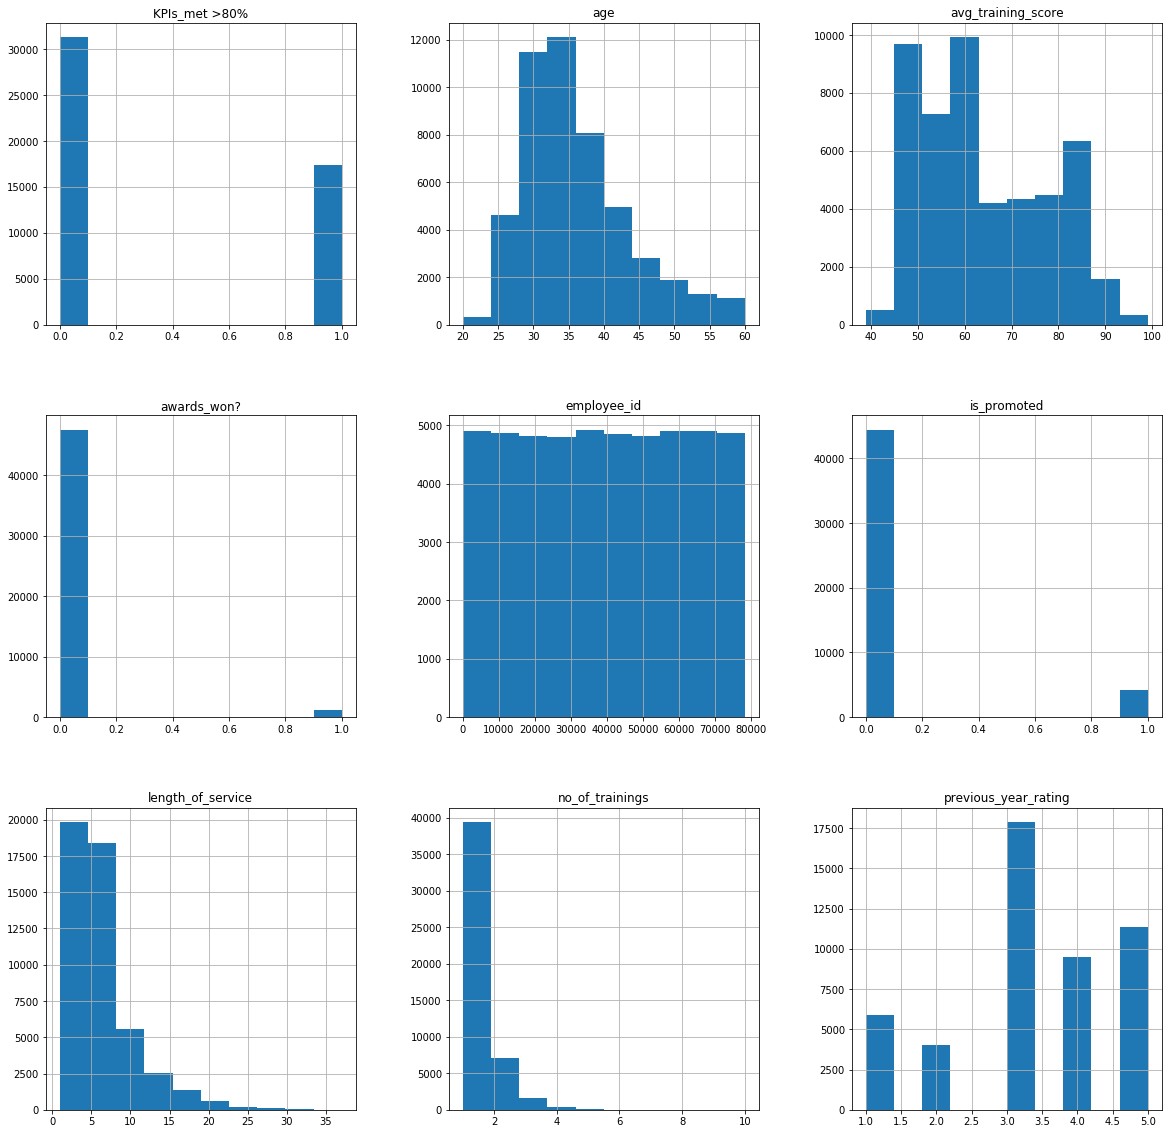

In [176]:
train_hr_dropna.hist(figsize=(20,20))

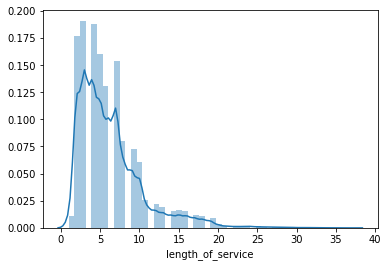

In [177]:
sns.distplot(train_hr_dropna['length_of_service']) 



In [178]:
train_hr_dropna['department'].value_counts()/train_hr_dropna.shape[0]*100

Sales & Marketing    29.262228
Operations           21.674887
Procurement          13.647760
Technology           13.362104
Analytics             9.473901
Finance               4.560214
HR                    4.401973
R&D                   1.835183
Legal                 1.781751
Name: department, dtype: float64

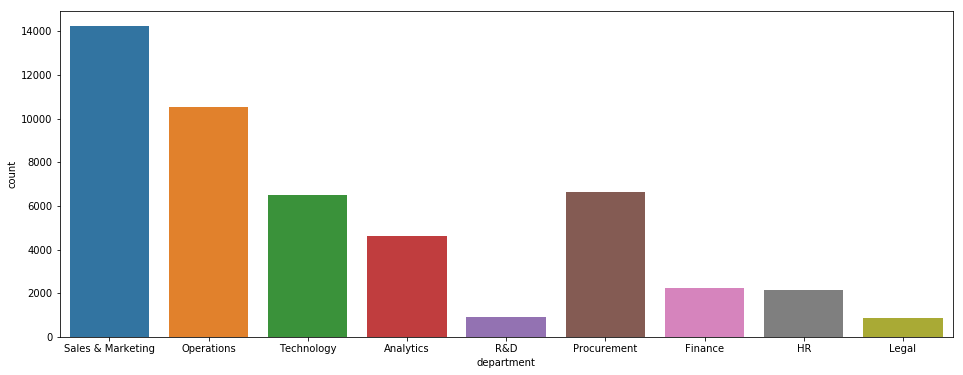

In [179]:
plt.figure(figsize=(16, 6))
sns.countplot(x='department',data=train_hr_dropna)

In [180]:
train_hr_dropna['education'].value_counts()/train_hr_dropna.shape[0]*100

Bachelor's          68.647760
Master's & above    30.411015
Below Secondary      0.941225
Name: education, dtype: float64

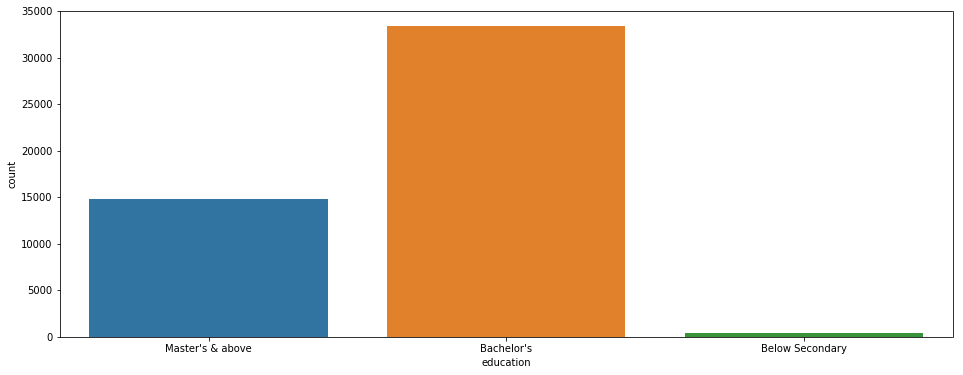

In [181]:
plt.figure(figsize=(16, 6))
sns.countplot(x='education',data=train_hr_dropna)

In [182]:
train_hr_dropna['region'].value_counts()/train_hr_dropna.shape[0]*100

region_2     22.217427
region_22    11.169338
region_7      9.036169
region_15     5.162351
region_13     5.061652
region_26     4.040279
region_31     3.477189
region_4      3.341554
region_27     2.914098
region_16     2.710645
region_11     2.443485
region_28     2.348952
region_23     2.268804
region_29     1.841348
region_19     1.722154
region_20     1.602959
region_32     1.588574
region_14     1.582409
region_17     1.524866
region_25     1.481710
region_5      1.418002
region_10     1.261817
region_30     1.237156
region_6      1.189889
region_8      1.187834
region_1      1.136457
region_24     0.949445
region_12     0.873407
region_21     0.760378
region_3      0.680230
region_9      0.665845
region_33     0.534320
region_34     0.519934
region_18     0.049322
Name: region, dtype: float64

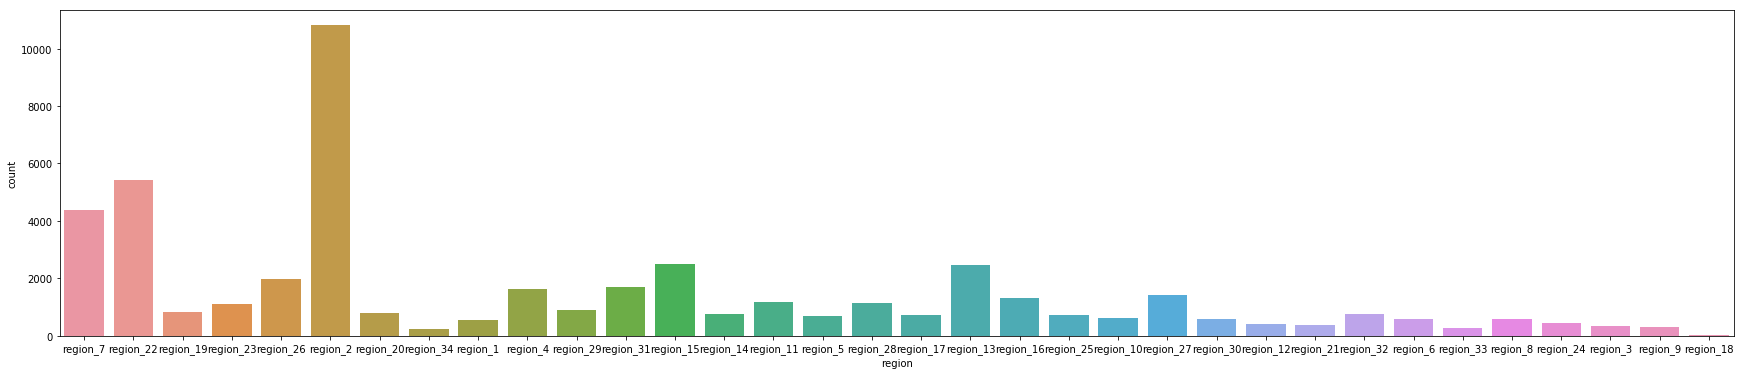

In [183]:
plt.figure(figsize=(30, 6))
sns.countplot(x='region',data=train_hr_dropna)

In [184]:
train_hr_dropna['gender'].value_counts()/train_hr_dropna.shape[0]*100

m    69.568434
f    30.431566
Name: gender, dtype: float64

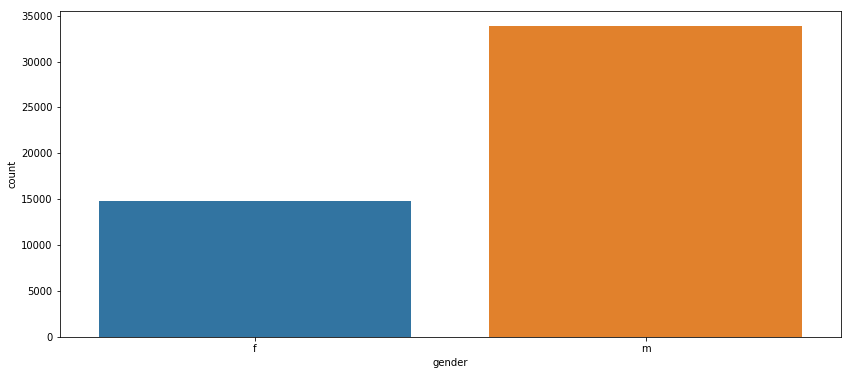

In [185]:
plt.figure(figsize=(14, 6))
sns.countplot(x='gender',data=train_hr_dropna)

In [186]:
train_hr_dropna['recruitment_channel'].value_counts()/train_hr_dropna.shape[0]*100

other       55.521989
sourcing    42.381833
referred     2.096178
Name: recruitment_channel, dtype: float64

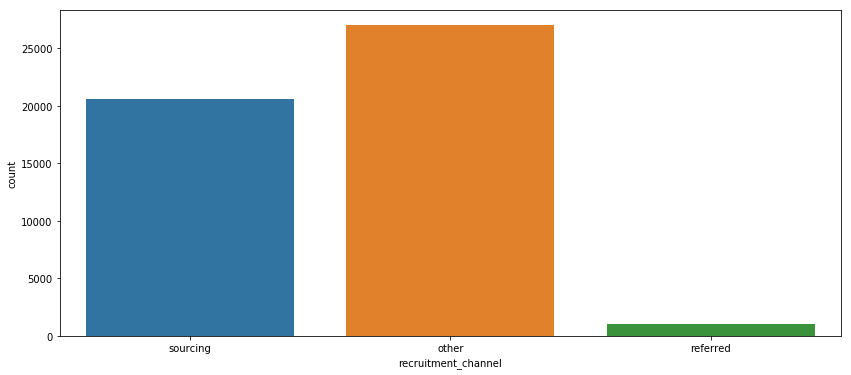

In [187]:
plt.figure(figsize=(14, 6))
sns.countplot(x='recruitment_channel',data=train_hr_dropna)

In [189]:
train_hr_dropna['length_of_service'].value_counts()/train_hr_dropna.shape[0]*100

3     13.727908
4     13.532676
2     12.710645
5     11.553637
7     11.066584
6      9.416358
8      5.762433
9      5.250719
10     4.397863
11     1.833128
12     1.594739
13     1.356350
15     1.191944
16     1.107686
14     1.101521
17     0.875462
18     0.789149
1      0.780929
19     0.655569
20     0.263050
21     0.152076
24     0.137690
23     0.127415
22     0.123305
25     0.100699
26     0.084258
27     0.073983
29     0.061652
28     0.059597
31     0.039046
30     0.024661
33     0.018496
32     0.018496
34     0.008220
37     0.002055
Name: length_of_service, dtype: float64

In [190]:
train_hr_dropna['length_of_service'].value_counts()

3     6680
4     6585
2     6185
5     5622
7     5385
6     4582
8     2804
9     2555
10    2140
11     892
12     776
13     660
15     580
16     539
14     536
17     426
18     384
1      380
19     319
20     128
21      74
24      67
23      62
22      60
25      49
26      41
27      36
29      30
28      29
31      19
30      12
33       9
32       9
34       4
37       1
Name: length_of_service, dtype: int64

In [191]:
train_hr_dropna['previous_year_rating'].value_counts()

3.0    17867
5.0    11362
4.0     9509
1.0     5887
2.0     4035
Name: previous_year_rating, dtype: int64

In [192]:
train_hr_dropna['previous_year_rating'].value_counts()/train_hr_dropna.shape[0]*100

3.0    36.718044
5.0    23.349774
4.0    19.541718
1.0    12.098233
2.0     8.292232
Name: previous_year_rating, dtype: float64

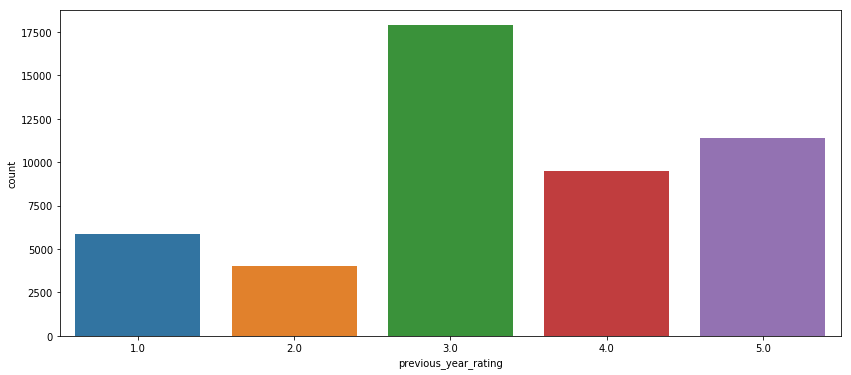

In [193]:
plt.figure(figsize=(14, 6))
sns.countplot(x='previous_year_rating',data=train_hr_dropna)

In [194]:
train_hr_dropna['KPIs_met >80%'].value_counts()

0    31314
1    17346
Name: KPIs_met >80%, dtype: int64

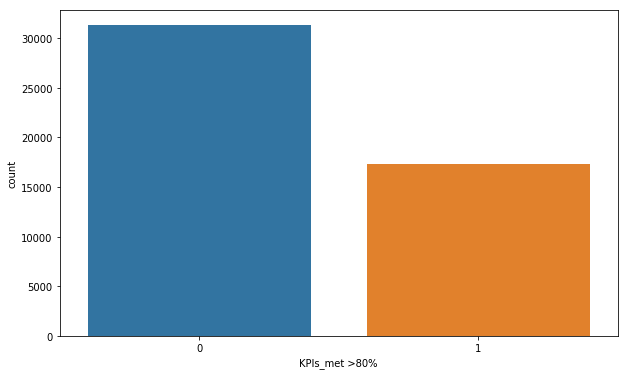

In [195]:
plt.figure(figsize=(10, 6))
sns.countplot(x='KPIs_met >80%',data=train_hr_dropna)

In [196]:
train_hr_dropna['awards_won?'].value_counts()

0    47534
1     1126
Name: awards_won?, dtype: int64

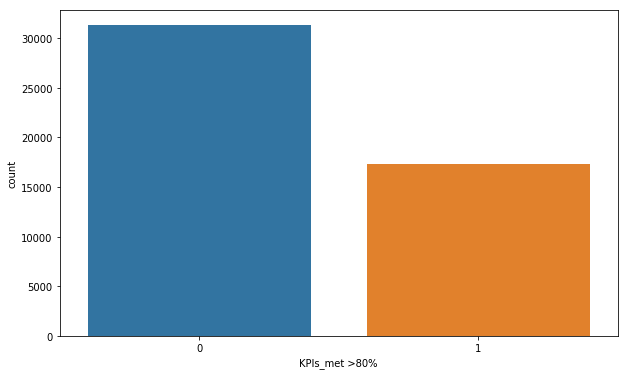

In [197]:
plt.figure(figsize=(10, 6))
sns.countplot(x='KPIs_met >80%',data=train_hr_dropna)

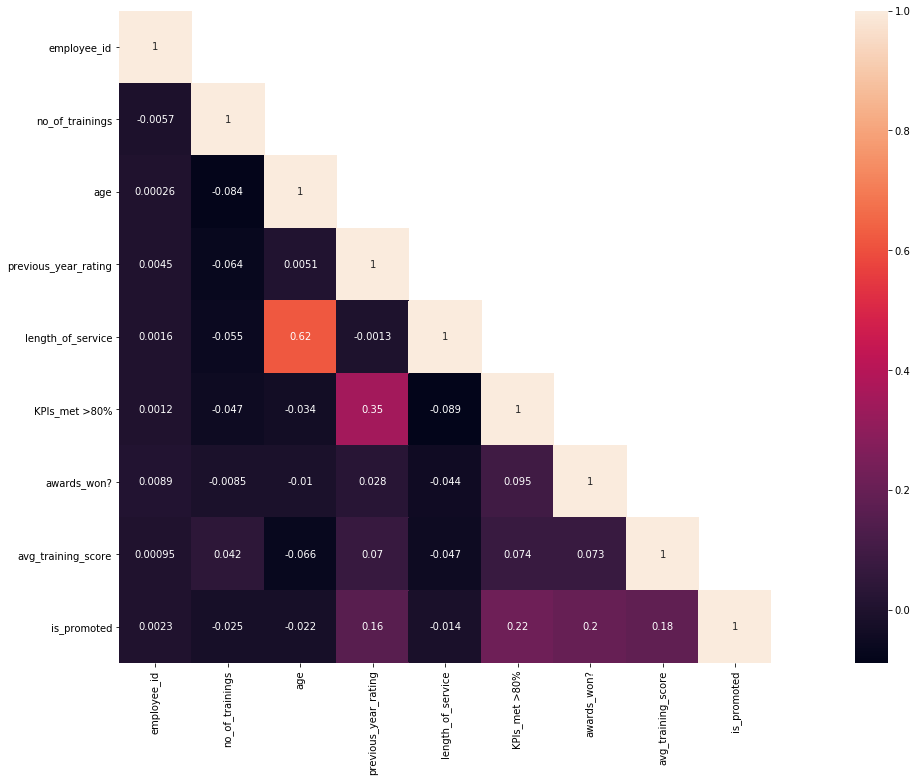

In [198]:
#corelation matrix.
cor_mat= train_hr_dropna.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


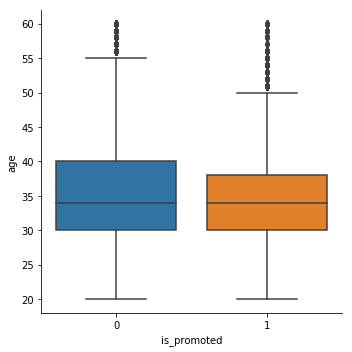

In [199]:
#3.1 ) Plotting the Features against the 'Target' variable.
# Age
sns.factorplot(data=train_hr_dropna,y='age',x='is_promoted',size=5,aspect=1,kind='box')

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1728x1008 with 0 Axes>

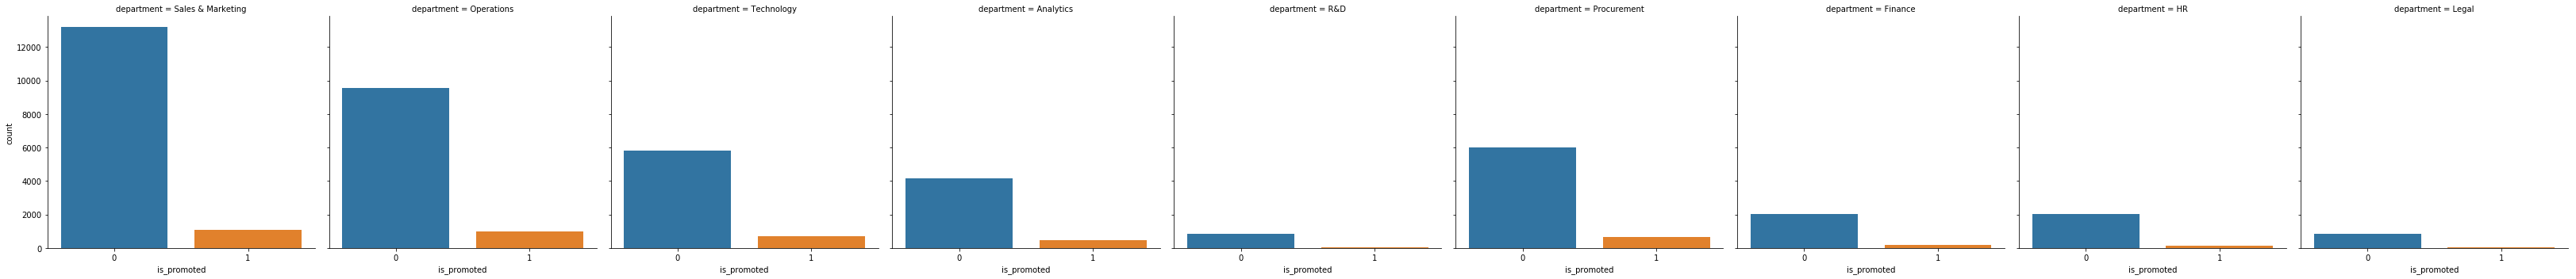

In [200]:
plt.figure(figsize=(24, 14))
sns.factorplot(data=train_hr_dropna,kind='count',x='is_promoted',col='department')

In [201]:
pd.crosstab(columns=[train_hr_dropna.is_promoted],index=[train_hr_dropna.department],margins=True,normalize='index') # set normalize=index to view rowwise %

is_promoted,0,1
department,,
Analytics,0.903471,0.096529
Finance,0.917981,0.082019
HR,0.943511,0.056489
Legal,0.951557,0.048443
Operations,0.907177,0.092823
Procurement,0.901973,0.098027
R&D,0.935050,0.064950
Sales & Marketing,0.925557,0.074443
Technology,0.893264,0.106736


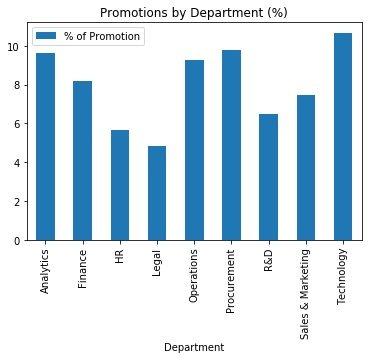

In [202]:
df_Department = pd.DataFrame(columns=["Department", "% of Promotion"])
i=0
for department in list(train_hr_dropna['department'].unique()):
    ratio = train_hr_dropna[(train_hr_dropna['department']==department)&(train_hr_dropna['is_promoted']==1)].shape[0] / train_hr_dropna[train_hr_dropna['department']==department].shape[0]
    df_Department.loc[i] = (department, ratio*100)
    i += 1
    #print("In {}, the ratio of Promotions is {:.2f}%".format(field, ratio*100))    
df_DF = df_Department.groupby(by="Department").sum()
df_DF.plot(kind='bar',title='Promotions by Department (%)')

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1008x432 with 0 Axes>

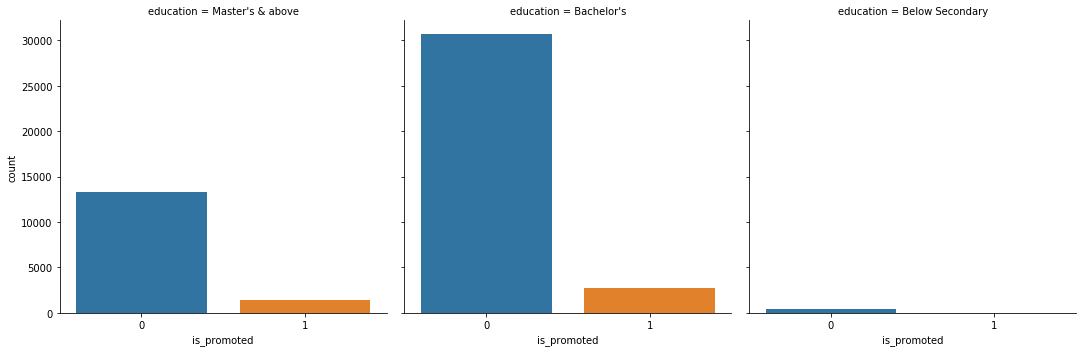

In [203]:
plt.figure(figsize=(14, 6))
sns.factorplot(data=train_hr_dropna,kind='count',x='is_promoted',col='education')

In [204]:
pd.crosstab(columns=[train_hr_dropna.is_promoted],index=[train_hr_dropna.education],margins=True,normalize='index')

is_promoted,0,1
education,,
Bachelor's,0.918183,0.081817
Below Secondary,0.921397,0.078603
Master's & above,0.901135,0.098865
All,0.913029,0.086971


C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


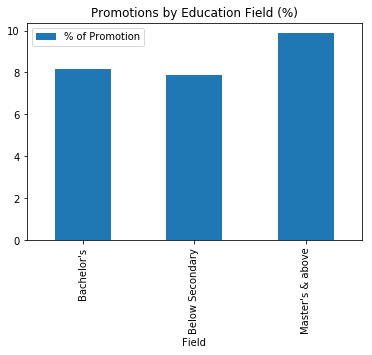

In [205]:
df_EducationField = pd.DataFrame(columns=["Field", "% of Promotion"])
i=0
for field in list(train_hr_dropna['education'].unique()):
    ratio = train_hr_dropna[(train_hr_dropna['education']==field)&(train_hr['is_promoted']==1)].shape[0] / train_hr_dropna[train_hr_dropna['education']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of Promotions is {:.2f}%".format(field, ratio*100))    
df_EF = df_EducationField.groupby(by="Field").sum()
df_EF.plot(kind='bar',title='Promotions by Education Field (%)')

In [206]:
pd.crosstab(columns=[train_hr_dropna.is_promoted],index=[train_hr_dropna.gender],margins=True,normalize='index')

is_promoted,0,1
gender,,
f,0.907955,0.092045
m,0.915249,0.084751
All,0.913029,0.086971


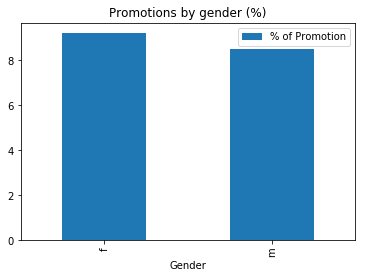

In [207]:
df_gender = pd.DataFrame(columns=["Gender", "% of Promotion"])
i=0
for gender in list(train_hr_dropna['gender'].unique()):
    ratio = train_hr_dropna[(train_hr_dropna['gender']==gender)&(train_hr_dropna['is_promoted']==1)].shape[0] / train_hr_dropna[train_hr_dropna['gender']==gender].shape[0]
    df_gender.loc[i] = (gender, ratio*100)
    i += 1
    #print("In {}, the ratio of Promotions is {:.2f}%".format(field, ratio*100))    
df_gender = df_gender.groupby(by="Gender").sum()
df_gender.plot(kind='bar',title='Promotions by gender (%)')

In [208]:
pd.crosstab(columns=[train_hr_dropna.is_promoted],index=[train_hr_dropna.recruitment_channel],margins=True,normalize='index')

is_promoted,0,1
recruitment_channel,,
other,0.914757,0.085243
referred,0.872549,0.127451
sourcing,0.912767,0.087233
All,0.913029,0.086971


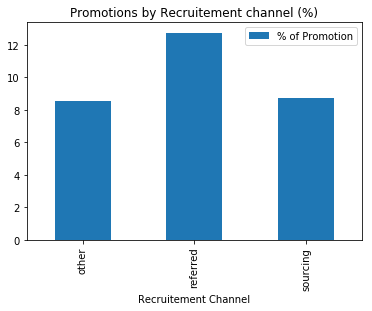

In [209]:
df_recruitement_channel = pd.DataFrame(columns=["Recruitement Channel", "% of Promotion"])
i=0
for rc in list(train_hr_dropna['recruitment_channel'].unique()):
    ratio = train_hr_dropna[(train_hr_dropna['recruitment_channel']==rc)&(train_hr_dropna['is_promoted']==1)].shape[0] / train_hr_dropna[train_hr_dropna['recruitment_channel']==rc].shape[0]
    df_recruitement_channel.loc[i] = (rc, ratio*100)
    i += 1
    #print("In {}, the ratio of Promotions is {:.2f}%".format(field, ratio*100))    
df_recruitement_channel = df_recruitement_channel.groupby(by="Recruitement Channel").sum()
df_recruitement_channel.plot(kind='bar',title='Promotions by Recruitement channel (%)')

In [210]:
pd.crosstab(columns=[train_hr_dropna.is_promoted],index=[train_hr_dropna.no_of_trainings],margins=True,normalize='index')

is_promoted,0,1
no_of_trainings,,
1,0.910076,0.089924
2,0.922471,0.077529
3,0.929702,0.070298
4,0.942786,0.057214
5,0.974138,0.025862
6,0.970588,0.029412
7,1.000000,0.000000
8,1.000000,0.000000
9,1.000000,0.000000


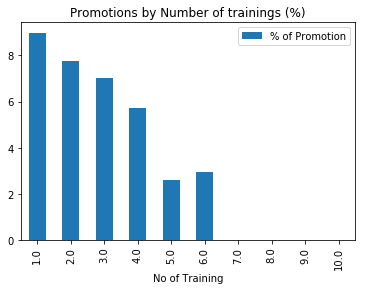

In [211]:
df_no_of_training = pd.DataFrame(columns=["No of Training", "% of Promotion"])
i=0
for no in list(train_hr_dropna['no_of_trainings'].unique()):
    ratio = train_hr_dropna[(train_hr_dropna['no_of_trainings']==no)&(train_hr_dropna['is_promoted']==1)].shape[0] / train_hr_dropna[train_hr_dropna['no_of_trainings']==no].shape[0]
    df_no_of_training.loc[i] = (no, ratio*100)
    i += 1
    #print("In {}, the ratio of Promotions is {:.2f}%".format(field, ratio*100))    
df_no_of_training = df_no_of_training.groupby(by="No of Training").sum()
df_no_of_training.plot(kind='bar',title='Promotions by Number of trainings (%)')

In [212]:
pd.crosstab(columns=[train_hr_dropna.is_promoted],index=[train_hr_dropna.previous_year_rating],margins=True,normalize='index')

is_promoted,0,1
previous_year_rating,,
1.0,0.985392,0.014608
2.0,0.955638,0.044362
3.0,0.925841,0.074159
4.0,0.919340,0.080660
5.0,0.834976,0.165024
All,0.913029,0.086971


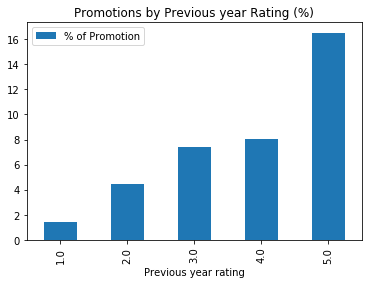

In [213]:
df_previous_year_rating = pd.DataFrame(columns=["Previous year rating", "% of Promotion"])
i=0
for pyr in list(train_hr_dropna['previous_year_rating'].unique()):
    ratio = train_hr_dropna[(train_hr_dropna['previous_year_rating']==pyr)&(train_hr_dropna['is_promoted']==1)].shape[0] / train_hr_dropna[train_hr_dropna['previous_year_rating']==pyr].shape[0]
    df_previous_year_rating.loc[i] = (pyr, ratio*100)
    i += 1
    #print("In {}, the ratio of Promotions is {:.2f}%".format(field, ratio*100))    
df_previous_year_rating = df_previous_year_rating.groupby(by="Previous year rating").sum()
df_previous_year_rating.plot(kind='bar',title='Promotions by Previous year Rating (%)')
plt.show()

In [214]:
df = train_hr_dropna.rename(columns={'awards_won?': 'awards_won','KPIs_met >80%':'KPIs_met'})

In [215]:
pd.crosstab(columns=[df.is_promoted],index=[df.KPIs_met],margins=True,normalize='index')

is_promoted,0,1
KPIs_met,,
0,0.959156,0.040844
1,0.829759,0.170241
All,0.913029,0.086971


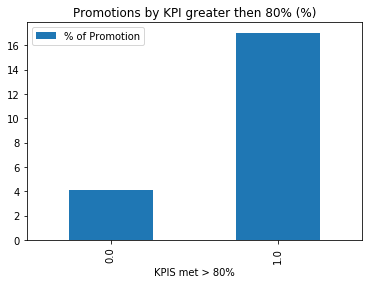

In [216]:
df_kpi_80 = pd.DataFrame(columns=["KPIS met > 80%", "% of Promotion"])
i=0
for kpi in list(train_hr_dropna['KPIs_met >80%'].unique()):
    ratio = train_hr_dropna[(train_hr_dropna['KPIs_met >80%']==kpi)&(train_hr_dropna['is_promoted']==1)].shape[0] / train_hr_dropna[train_hr_dropna['KPIs_met >80%']==kpi].shape[0]
    df_kpi_80.loc[i] = (kpi, ratio*100)
    i += 1
    #print("In {}, the ratio of Promotions is {:.2f}%".format(field, ratio*100))    
df_kpi_80 = df_kpi_80.groupby(by="KPIS met > 80%").sum()
df_kpi_80.plot(kind='bar',title='Promotions by KPI greater then 80% (%)')
plt.show()

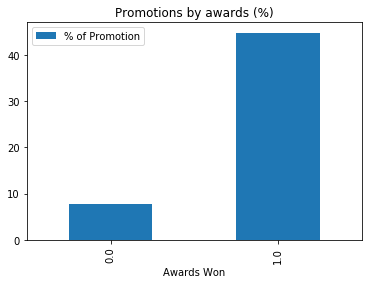

In [217]:
df_awards_won = pd.DataFrame(columns=["Awards Won", "% of Promotion"])
i=0
for awards in list(train_hr_dropna['awards_won?'].unique()):
    ratio = train_hr_dropna[(train_hr_dropna['awards_won?']==awards)&(train_hr_dropna['is_promoted']==1)].shape[0] / train_hr_dropna[train_hr_dropna['awards_won?']==awards].shape[0]
    df_awards_won.loc[i] = (awards, ratio*100)
    i += 1
    #print("In {}, the ratio of Promotions is {:.2f}%".format(field, ratio*100))    
df_awards_won = df_awards_won.groupby(by="Awards Won").sum()
df_awards_won.plot(kind='bar',title='Promotions by awards (%)')
plt.show()

In [218]:
#Label Encoding
def transform(feature):
    le=LabelEncoder()
    train_hr_dropna[feature]=le.fit_transform(train_hr_dropna[feature])
    print(le.classes_)

In [219]:
cat_df=train_hr_dropna.select_dtypes(include='object')
cat_df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [220]:
for col in cat_df.columns:
    transform(col)


C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


['Analytics' 'Finance' 'HR' 'Legal' 'Operations' 'Procurement' 'R&D'
 'Sales & Marketing' 'Technology']
['region_1' 'region_10' 'region_11' 'region_12' 'region_13' 'region_14'
 'region_15' 'region_16' 'region_17' 'region_18' 'region_19' 'region_2'
 'region_20' 'region_21' 'region_22' 'region_23' 'region_24' 'region_25'
 'region_26' 'region_27' 'region_28' 'region_29' 'region_3' 'region_30'
 'region_31' 'region_32' 'region_33' 'region_34' 'region_4' 'region_5'
 'region_6' 'region_7' 'region_8' 'region_9']
["Bachelor's" 'Below Secondary' "Master's & above"]
['f' 'm']
['other' 'referred' 'sourcing']


In [221]:
train_hr_dropna.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [294]:
train,test = train_test_split(train_hr_dropna,test_size=0.3,
                             random_state = 100)
print(train.shape)
print(test.shape)
train_y = train['is_promoted']
test_y  = test ['is_promoted']
train_x = train.drop(['is_promoted','employee_id'], axis = 1)#axis 1 is for row wise operation
test_x  = test.drop (['is_promoted','employee_id'], axis = 1)
train_x.shape


(34062, 14)
(14598, 14)


(34062, 12)

In [295]:
#Handling imbalanced class
oversampler=SMOTE(random_state=42)
x_train_smote,  y_train_smote = oversampler.fit_sample(train_x,train_y)

In [296]:
logreg = LogisticRegression(random_state=1)
logreg.fit(x_train_smote,y_train_smote)
log_pred  = logreg.predict(test_x)
df_logreg   = pd.DataFrame({'actual': test_y,
                         'predicted': log_pred})

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [297]:
#MANUALLY CHECKING 
tp_log = df_logreg[(df_logreg['predicted']==1) & (df_logreg['actual']==1)].shape[0]
tn_log = df_logreg[(df_logreg['predicted']==0) & (df_logreg['actual']==0)].shape[0]
fp_log = df_logreg[(df_logreg['predicted']==0) & (df_logreg['actual']==1)].shape[0]
fn_log = df_logreg[(df_logreg['predicted']==1) & (df_logreg['actual']==0)].shape[0]
print(tp_log,tn_log,fp_log,fn_log)

885 9585 367 3761


In [298]:
#Check confusion matrix
print(confusion_matrix(test_y,log_pred))

[[9585 3761]
 [ 367  885]]


In [378]:
sensitivity_log = tp_log/(tp_log+fn_log)
print(sensitivity_log)
specificity_log = tn_log/(tn_log+fp_log)
print(specificity_log)
precision_log = tp_log/(tp_log+fp_log)
print(precision_log)
f1_score = 2*(precision_log*sensitivity_log)/(precision_log+sensitivity_log)
print(f1_score)

0.19048643994834266
0.9631229903536977
0.7068690095846646
0.3001017293997965


In [300]:
#To check with report
print(classification_report(test_y,log_pred))


              precision    recall  f1-score   support

           0       0.96      0.72      0.82     13346
           1       0.19      0.71      0.30      1252

   micro avg       0.72      0.72      0.72     14598
   macro avg       0.58      0.71      0.56     14598
weighted avg       0.90      0.72      0.78     14598



In [380]:
logisticregression = pd.Series({'TP': tp_log, 'TN' : tn_log, 'FP': fp_log, 'FN': fn_log, 'SENSITIVITY': sensitivity_log,
                  'SPECIFICITY': specificity_log,'Precision':precision_log,'f1_score':f1_score})
logisticregression

TP              885.000000
TN             9585.000000
FP              367.000000
FN             3761.000000
SENSITIVITY       0.190486
SPECIFICITY       0.963123
Precision         0.706869
f1_score          0.300102
dtype: float64

In [321]:
model_decisiontree = DecisionTreeClassifier(random_state = 1,max_features=4,max_depth=1)
model_decisiontree
model_decisiontree.fit(x_train_smote,y_train_smote)
decisiontree_pred = model_decisiontree.predict(test_x)
print(len(test_pred))
df_decisiontree = pd.DataFrame({'actual':test_y,
                        'predicted': decisiontree_pred})

14598


In [322]:
#MANUALLY CHECKING 
tp_dt = df_decisiontree[(df_decisiontree['predicted']==1) & (df_decisiontree['actual']==1)].shape[0]
tn_dt = df_decisiontree[(df_decisiontree['predicted']==0) & (df_decisiontree['actual']==0)].shape[0]
fp_dt = df_decisiontree[(df_decisiontree['predicted']==0) & (df_decisiontree['actual']==1)].shape[0]
fn_dt = df_decisiontree[(df_decisiontree['predicted']==1) & (df_decisiontree['actual']==0)].shape[0]
print(tp_dt,tn_dt,fp_dt,fn_dt)

205 13116 1047 230


In [323]:
sensitivity_dt = tp_dt/(tp_dt+fn_dt)
print(sensitivity_dt)
specificity_dt = tn_dt/(tn_dt+fp_dt)
print(specificity_dt)
precision_dt = tp_dt/(tp_dt+fp_dt)
print(precision_dt)
f1_score_dt = 2*(precision_dt*sensitivity_dt)/(precision_dt+sensitivity_dt)
print(f1_score_dt)


0.47126436781609193
0.9260749841135353
0.16373801916932906
0.24303497332542973


In [381]:
decisiontree = pd.Series({'TP': tp_dt, 'TN' : tn_dt, 'FP': fp_dt, 'FN': fn_dt, 'SENSITIVITY': sensitivity_dt,
                  'SPECIFICITY': specificity_dt,'Precision':precision_dt,'f1_score':f1_score_dt})
decisiontree

TP               205.000000
TN             13116.000000
FP              1047.000000
FN               230.000000
SENSITIVITY        0.471264
SPECIFICITY        0.926075
Precision          0.163738
f1_score           0.243035
dtype: float64

In [325]:
model_rf = RandomForestClassifier(random_state=1,n_estimators=50,max_features=4,max_depth=1)
model_rf.fit(x_train_smote,y_train_smote)

test_pred_rf = model_rf.predict(test_x)
df_rf   = pd.DataFrame({'actual': test_y,
                         'predicted': test_pred_rf})


In [326]:
tp_rf = df_rf[(df_rf['predicted']==1) & (df_rf['actual']==1)].shape[0]
tn_rf = df_rf[(df_rf['predicted']==0) & (df_rf['actual']==0)].shape[0]
fp_rf = df_rf[(df_rf['predicted']==0) & (df_rf['actual']==1)].shape[0]
fn_rf = df_rf[(df_rf['predicted']==1) & (df_rf['actual']==0)].shape[0]
print(tp_rf,tn_rf,fp_rf,fn_rf)

925 8889 327 4457


In [327]:
sensitivity_rf = tp_rf/(tp_rf+fn_rf)
print(sensitivity_rf)
specificity_rf = tn_rf/(tn_rf+fp_rf)
print(specificity_rf)
precision_rf = tp_rf/(tp_rf+fp_rf)
print(precision_rf)
f1_score_rf=2*(precision_rf*sensitivity_rf)/(precision_rf+sensitivity_rf)
print(f1_score_rf)

0.17186919360832403
0.9645182291666666
0.7388178913738019
0.27886644558335844


In [382]:
randomforest = pd.Series({'TP': tp_rf, 'TN' : tn_rf, 'FP': fp_rf, 'FN': fn_rf, 'SENSITIVITY': sensitivity_rf,
                  'SPECIFICITY': specificity_rf,'Precision':precision_rf,'f1_score':f1_score_rf})
randomforest

TP              925.000000
TN             8889.000000
FP              327.000000
FN             4457.000000
SENSITIVITY       0.171869
SPECIFICITY       0.964518
Precision         0.738818
f1_score          0.278866
dtype: float64

In [336]:
model_ada = AdaBoostClassifier(random_state=1,base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=50)
model_ada.fit(x_train_smote,y_train_smote)
test_pred_abm = model_ada.predict(test_x)
df_abm  = pd.DataFrame({'actual': test_y,
                         'predicted': test_pred_abm})

In [337]:
tp_ada = df_abm[(df_abm['predicted']==1) & (df_abm['actual']==1)].shape[0]
tn_ada = df_abm[(df_abm['predicted']==0)& (df_abm['actual']==0)].shape[0]
fp_ada = df_abm[(df_abm['predicted']==0) & (df_abm['actual']==1)].shape[0]
fn_ada = df_abm[(df_abm['predicted']==1) & (df_abm['actual']==0)].shape[0]
print(tp_ada,tn_ada,fp_ada,fn_ada)

360 12512 892 834


In [338]:
sensitivity_abm = tp_ada/(tp_ada+fn_ada)
print(sensitivity_abm)
specificity_abm = tn_ada/(tn_ada+fp_ada)
print(specificity_abm)
precision_abm = tp_ada/(tp_ada+fp_ada)
print(precision_abm)
f1_score_abm=2*(precision_abm*sensitivity_abm)/(precision_abm+sensitivity_abm)
print(f1_score_abm)


0.3015075376884422
0.9334527006863623
0.28753993610223644
0.2943581357318071


In [383]:
s_abm = pd.Series({'TP': tp_ada, 'TN' : tn_ada, 'FP': fp_ada, 'FN': fn_ada, 'SENSITIVITY': sensitivity_abm,
                  'SPECIFICITY': specificity_abm,'Precision':precision_abm,'f1_score':f1_score_abm})
s_abm

TP               360.000000
TN             12512.000000
FP               892.000000
FN               834.000000
SENSITIVITY        0.301508
SPECIFICITY        0.933453
Precision          0.287540
f1_score           0.294358
dtype: float64

In [352]:
train_x.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [355]:
test_x.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [359]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train_smote,y_train_smote)

test_pred_SVC = linear_svc.predict(test_x)
df_svc   = pd.DataFrame({'actual': test_y,
                         'predicted': test_pred_SVC})

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [360]:
tp_svm = df_svc[(df_svc['predicted']==1) & (df_svc['actual']==1)].shape[0]
tn_svm = df_svc[(df_svc['predicted']==0)& (df_svc['actual']==0)].shape[0]
fp_svm = df_svc[(df_svc['predicted']==0) & (df_svc['actual']==1)].shape[0]
fn_svm = df_svc[(df_svc['predicted']==1) & (df_svc['actual']==0)].shape[0]
print(tp_svm,tn_svm,fp_svm,fn_svm)

80 13263 1172 83


In [361]:
sensitivity_svm = tp_svm/(tp_svm+fn_svm)
print(sensitivity_svm)
specificity_svm = tn_svm/(tn_svm+fp_svm)
print(specificity_svm)

precision_svm = tp_svm/(tp_svm+fp_svm)
print(precision_svm)
f1_score_svm = 2*(precision_svm*sensitivity_svm)/(precision_svm+sensitivity_svm)
print(f1_score_svm)


0.49079754601226994
0.9188084516799446
0.06389776357827476
0.11307420494699645


In [384]:
s_svm = pd.Series({'TP': tp_svm, 'TN' : tn_svm, 'FP': fp_svm, 'FN': fn_svm, 'SENSITIVITY': sensitivity_svm,
                  'SPECIFICITY': specificity_svm,'Precision':precision_svm,'f1_score':f1_score_svm})
s_svm

TP                80.000000
TN             13263.000000
FP              1172.000000
FN                83.000000
SENSITIVITY        0.490798
SPECIFICITY        0.918808
Precision          0.063898
f1_score           0.113074
dtype: float64

In [372]:
xgb = XGBClassifier(n_estimators=50,max_depth=4)
xgb.fit(x_train_smote,y_train_smote)
test_pred_xgb = xgb.predict(test_x)
df_xgb  = pd.DataFrame({'actual': test_y,
                         'predicted': test_pred_xgb})


In [373]:
tp_xgb = df_xgb[(df_xgb['predicted']==1) & (df_xgb['actual']==1)].shape[0]
tn_xgb = df_xgb[(df_xgb['predicted']==0)& (df_xgb['actual']==0)].shape[0]
fp_xgb = df_xgb[(df_xgb['predicted']==0) & (df_xgb['actual']==1)].shape[0]
fn_xgb = df_xgb[(df_xgb['predicted']==1) & (df_xgb['actual']==0)].shape[0]
print(tp_xgb,tn_xgb,fp_xgb,fn_xgb)

311 13228 941 118


In [374]:
sensitivity_xgb = tp_xgb/(tp_xgb+fn_xgb)
print(sensitivity_xgb)
specificity_xgb = tn_xgb/(tn_xgb+fp_xgb)
print(specificity_xgb)

precision_xgb = tp_xgb/(tp_xgb+fp_xgb)
print(precision_xgb)
f1_score_xgb = 2*(precision_xgb*sensitivity_xgb)/(precision_xgb+sensitivity_xgb)
print(f1_score_xgb)

0.7249417249417249
0.9335874091326134
0.24840255591054314
0.37001784651992864


In [385]:
s_xgb = pd.Series({'TP': tp_xgb, 'TN' : tn_xgb, 'FP': fp_xgb, 'FN': fn_xgb, 'SENSITIVITY': sensitivity_xgb,
                  'SPECIFICITY': specificity_xgb,'Precision':precision_xgb,'f1_score':f1_score_xgb})

In [387]:
df_complete = pd.DataFrame({'Logistic Regression': logisticregression, 'Decision Tree': decisiontree, 'Random Forest': randomforest,'Ada Boost':s_abm,'SVM':s_svm,'XGBOOST':s_xgb})
df_complete

,Logistic Regression,Decision Tree,Random Forest,Ada Boost,SVM,XGBOOST
TP,885.000000,205.000000,925.000000,360.000000,80.000000,311.000000
TN,9585.000000,13116.000000,8889.000000,12512.000000,13263.000000,13228.000000
FP,367.000000,1047.000000,327.000000,892.000000,1172.000000,941.000000
FN,3761.000000,230.000000,4457.000000,834.000000,83.000000,118.000000
SENSITIVITY,0.190486,0.471264,0.171869,0.301508,0.490798,0.724942
SPECIFICITY,0.963123,0.926075,0.964518,0.933453,0.918808,0.933587
Precision,0.706869,0.163738,0.738818,0.287540,0.063898,0.248403
f1_score,0.300102,0.243035,0.278866,0.294358,0.113074,0.370018
